In [ ]:
!pip install yahoo_fin
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yahoo_fin.stock_info as si
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [ ]:
df_ndq100 = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]

In [ ]:
list_ndq100 = df_ndq100['Ticker'].to_list()

In [ ]:
stock_list = ['a','aal','aapl','abbv','abt','adbe','adi','aig','amat','amc','amd','amgn','amkr','avgo','axp','ba','baba',
              'bac','bbby','bj','c','cah','cat','ccl','cpe','crm','csco','cvx','ddog','dis','dow','dks','ed','fb','fsly',
              'gfs','gme','goog','grab','gs','hd','hlt','hon','hsbc','ibkr','ibm',
              'intc','jnj','jpm','k','ko','lin','lly','lrcx','low','ma','mcd','merc','mmm','msft','ms','mu','nke','nvda','on',
              'orcl','pcg','pep','pfe','pg','plug','qcom','ride','rtx','sbux','schw','se','snap','sndl','snow','sofi','stm',
              'stx','trv','tsem','tsla','tsm','txn','u','ubs','uctt','umc','unh','ups','upst','v','vz','wfc','wmt','xom']

In [ ]:
#print(len(stock_list))
print(len(list_ndq100))

102


# CLUSTERING

Cluster companies based on their cashflows

In [ ]:
si.get_cash_flow('5168.KL')

In [ ]:
for i in list_ndq100:
  si.get_cash_flow(i)
  print(i,' ok')


In [ ]:
list_investing_cashflow = []
for i in stock_list:
  meanivcashflow = si.get_cash_flow(i).transpose()['totalCashflowsFromInvestingActivities'].mean()
  list_investing_cashflow.append(meanivcashflow)
  print(i,'done')

In [ ]:
list_operating_cashflow = []
for i in list_ndq100:
  meanopcashflow = si.get_cash_flow(i).transpose()['totalCashFromOperatingActivities'][0]
  list_operating_cashflow.append(meanopcashflow)
  print(i,'done')

In [ ]:
list_financing_cashflow = []
for i in list_snp500:
  meanficashflow = si.get_cash_flow(i).transpose()['totalCashFromFinancingActivities'][0]
  list_financing_cashflow.append(meanficashflow)
  print(i,'done')


In [ ]:
x = np.arange(len(stock_list))

In [ ]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

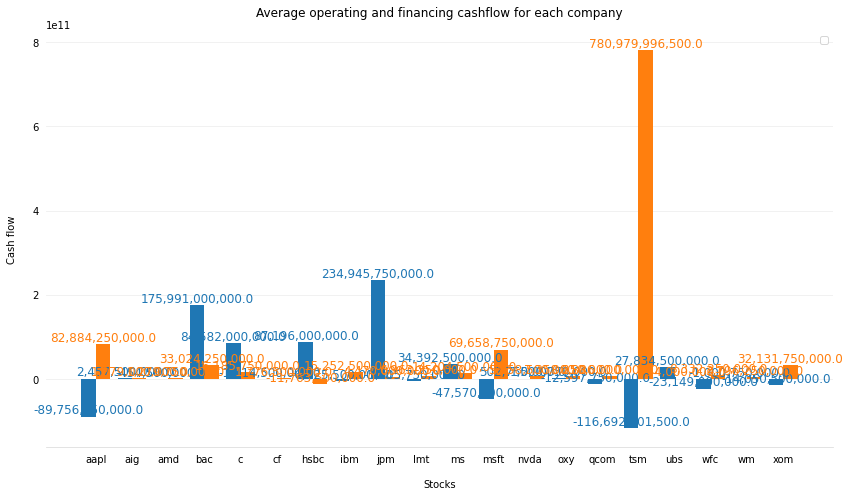

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))
b1 = ax.bar(x,listt, width = 0.4)
b2 = ax.bar(x + 0.4, list_operating_cashflow, width = 0.4)

ax.set_xticks(x + 0.4 / 2)
ax.set_xticklabels(stock_list)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Stocks', labelpad=15)
ax.set_ylabel('Cash flow', labelpad=15)
ax.set_title('Average operating and financing cashflow for each company', pad=15)

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

fig.tight_layout()

In [ ]:
import plotly.express as px

In [ ]:
df = pd.DataFrame(
    {'Stock':stock_list,
     'Mean financing cashflow':list_financing_cashflow,
     'Mean operating cashflow':list_operating_cashflow,
     'Mean investing cashflow':list_investing_cashflow})

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
fig = px.scatter_3d(df, x = df['Mean financing cashflow'], y = df['Mean operating cashflow'],z = df['Mean investing cashflow'],
                    custom_data = ['Stock'])
fig.update_traces(textposition = 'top center')

fig.update_layout(
    height = 800,
    title_text = 'Average operating and financing cashflow for each company')
temp1 = fig.data[0].hovertemplate
fig.update_traces(hovertemplate = temp1 + '<br>' + 'Stock: %{customdata[0]}')
fig.show()

Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [ ]:
df.head()

,Stock,Mean financing cashflow,Mean operating cashflow,Mean investing cashflow
0,a,-6.960000e+08,1.485000e+09,-7.490000e+08
1,aal,5.288000e+09,7.040000e+08,-5.983000e+09
2,aapl,-9.335300e+10,1.040380e+11,-1.454500e+10
3,abbv,-1.903900e+10,2.277700e+10,-2.344000e+09
4,abt,-5.494000e+09,1.053300e+10,-2.008000e+09


In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Mean financing cashflow','Mean operating cashflow','Mean investing cashflow']])

df_scale = pd.DataFrame(scale, columns = ['Mean financing cashflow','Mean operating cashflow','Mean investing cashflow'])

df_scale.head(5)

,Mean financing cashflow,Mean operating cashflow,Mean investing cashflow
0,0.240666,0.011578,0.967259
1,0.256208,0.010883,0.961200
2,0.000000,0.102843,0.951290
3,0.193022,0.030526,0.965413
4,0.228203,0.019630,0.965802


In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [ ]:
kmeans = cluster.KMeans(n_clusters = 3)
kmeans = kmeans.fit(pca_df)

In [ ]:
K = range(2,12)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    print('k:',k,'wss:',wss_iter)
    wss.append(wss_iter)

k: 2 wss: 1.621120172773365
k: 3 wss: 0.5767258806586274
k: 4 wss: 0.33330291495374237
k: 5 wss: 0.1643740289170344
k: 6 wss: 0.11197640060355729
k: 7 wss: 0.08463390584929
k: 8 wss: 0.06318817091388115
k: 9 wss: 0.0506199655557258
k: 10 wss: 0.04372920779402764
k: 11 wss: 0.03480409318270293


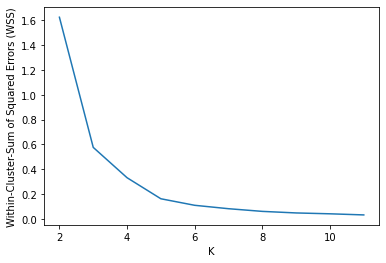

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
for i in range(2,13):
  labels = cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
  +str(metrics.silhouette_score(df_scale,labels,metric = "euclidean",sample_size = 1000,random_state = 200)))

Silhouette score for k(clusters) = 2 is 0.9049568691410872
Silhouette score for k(clusters) = 3 is 0.8968487604831712
Silhouette score for k(clusters) = 4 is 0.8048274116164629
Silhouette score for k(clusters) = 5 is 0.7748213262506158
Silhouette score for k(clusters) = 6 is 0.7235283098698078
Silhouette score for k(clusters) = 7 is 0.7255173760150767
Silhouette score for k(clusters) = 8 is 0.7143461223537986
Silhouette score for k(clusters) = 9 is 0.5292103717807712
Silhouette score for k(clusters) = 10 is 0.5419630895991142
Silhouette score for k(clusters) = 11 is 0.5276833868927696
Silhouette score for k(clusters) = 12 is 0.5109372523067348


In [ ]:
kmeans.fit_predict(pca_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

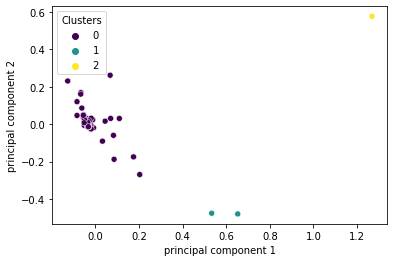

In [ ]:
pca_df['Clusters'] = kmeans.labels_

ax = sns.scatterplot(x = "principal component 1", y = "principal component 2",hue = 'Clusters',  data = pca_df, palette = 'viridis')

plt.show()

In [ ]:
df['Cluster'] = pca_df['Clusters']

In [ ]:
df['Cluster'].value_counts()

0    97
1     2
2     1
Name: Cluster, dtype: int64

In [ ]:
fig = px.scatter_3d(df, x = 'Mean financing cashflow', y = 'Mean operating cashflow', z = 'Mean investing cashflow',
                        color = 'Cluster', opacity = 0.7,
                        custom_data = ['Stock']
                   )

temp1 = fig.data[0].hovertemplate
fig.update_traces(hovertemplate = temp1 + '<br>' + "Stock: %{customdata[0]}")

Error: ignored

Figure({
    'data': [{'customdata': array([['a'],
                                   ['aal'],
                                   ['aapl'],
                                   ['abbv'],
                                   ['abt'],
                                   ['adbe'],
                                   ['adi'],
                                   ['aig'],
                                   ['amat'],
                                   ['amc'],
                                   ['amd'],
                                   ['amgn'],
                                   ['amkr'],
                                   ['avgo'],
                                   ['axp'],
                                   ['ba'],
                                   ['baba'],
                                   ['bac'],
                                   ['bbby'],
                                   ['bj'],
                                   ['c'],
                                   ['cah'],
                                   ['cat'],
                                   ['ccl'],
                                   ['cpe'],
                                   ['crm'],
                                   ['csco'],
                                   ['cvx'],
                                   ['ddog'],
                                   ['dis'],
                                   ['dow'],
                                   ['dks'],
                                   ['ed'],
                                   ['fb'],
                                   ['fsly'],
                                   ['gfs'],
                                   ['gme'],
                                   ['goog'],
                                   ['grab'],
                                   ['gs'],
                                   ['hd'],
                                   ['hlt'],
                                   ['hon'],
                                   ['hsbc'],
                                   ['ibkr'],
                                   ['ibm'],
                                   ['intc'],
                                   ['jnj'],
                                   ['jpm'],
                                   ['k'],
                                   ['ko'],
                                   ['lin'],
                                   ['lly'],
                                   ['lrcx'],
                                   ['low'],
                                   ['ma'],
                                   ['mcd'],
                                   ['merc'],
                                   ['mmm'],
                                   ['msft'],
                                   ['ms'],
                                   ['mu'],
                                   ['nke'],
                                   ['nvda'],
                                   ['on'],
                                   ['orcl'],
                                   ['pcg'],
                                   ['pep'],
                                   ['pfe'],
                                   ['pg'],
                                   ['plug'],
                                   ['qcom'],
                                   ['ride'],
                                   ['rtx'],
                                   ['sbux'],
                                   ['schw'],
                                   ['se'],
                                   ['snap'],
                                   ['sndl'],
                                   ['snow'],
                                   ['sofi'],
                                   ['stm'],
                                   ['stx'],
                                   ['trv'],
                                   ['tsem'],
                                   ['tsla'],
                                   ['tsm'],
                                   ['txn'],
                                   ['u'],
                                   ['ubs'],
                   

In [ ]:
import pandas as pd 
import requests

In [ ]:
url = 'https://www.klsescreener.com/v2/stocks/view/7050/wong-engineering-corporation-berhad'

In [ ]:
r = requests.get(url)
r.status_code

503

In [ ]:
df = pd.read_html(r.text)

ValueError: ignored

# PLOTTING CASHFLOWS OF INDIVIDUAL STOCKS

In [ ]:
aapl_mth_cf = si.get_cash_flow('aapl', yearly = False)

In [ ]:
aapl_mth_cf = aapl_mth_cf.transpose()

In [ ]:
aapl_mth_cf = aapl_mth_cf[['totalCashflowsFromInvestingActivities','totalCashFromFinancingActivities','totalCashFromOperatingActivities']]

In [ ]:
pd.set_option('display.float_format', lambda x: '%15f' % x)

In [ ]:
aapl_mth_cf

Breakdown,totalCashflowsFromInvestingActivities,totalCashFromFinancingActivities,totalCashFromOperatingActivities
endDate,,,
2022-06-25,4234000000.000000,-27445000000.000000,22892000000.000000
2022-03-26,-9265000000.000000,-28351000000.000000,28166000000.000000
2021-12-25,-16106000000.000000,-28159000000.000000,46966000000.000000
2021-09-25,835000000.000000,-20382000000.000000,20200000000.000000


In [ ]:
si.get_company_info('0856.HK')

,Value
Breakdown,
sector,Technology
fullTimeEmployees,4368
compensationRisk,8
auditRisk,4
longBusinessSummary,"VSTECS Holdings Limited, an investment holding..."
city,Central
phone,852 2786 1836
shareHolderRightsRisk,3
compensationAsOfEpochDate,1640908800


In [ ]:
def plot_for_cf(ticker):
  listt = ['totalCashflowsFromInvestingActivities','totalCashFromFinancingActivities','totalCashFromOperatingActivities']
  df_quarter = si.get_cash_flow(ticker, yearly = False)
  df_yearly = si.get_cash_flow(ticker, yearly = True)  
  df_quarter = df_quarter.transpose()
  df_yearly = df_yearly.transpose()
  df_qready = df_quarter[listt]
  df_yready = df_yearly[listt]
  fig1 = px.line(df_qready, color = 'Breakdown', symbol = 'Breakdown')
  fig1.update_layout(title = f'Cash Flows for {ticker.upper()} for the past four quarters',)
  fig1.show()

  fig2 = px.line(df_yready, color = 'Breakdown', symbol = 'Breakdown')
  fig2.update_layout(title = f'Cash Flows for {ticker.upper()} for the past four years',)
  fig2.show()
  return fig1,fig2 #qplot, yplot

In [ ]:
plot_for_cf('3333.HK')

(Figure({
     'data': [{'hovertemplate': ('Breakdown=totalCashflowsFromIn' ... '}<br>value=%{y}<extra></extra>'),
               'legendgroup': 'totalCashflowsFromInvestingActivities',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines+markers',
               'name': 'totalCashflowsFromInvestingActivities',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([datetime.datetime(2021, 6, 30, 0, 0),
                           datetime.datetime(2021, 3, 31, 0, 0),
                           datetime.datetime(2020, 12, 31, 0, 0),
                           datetime.datetime(2020, 9, 30, 0, 0)], dtype=object),
               'xaxis': 'x',
               'y': array([-9.809e+09, -9.809e+09, -5.725e+09, -5.725e+09]),
               'yaxis': 'y'},
              {'hovertemplate': ('Breakdown=totalCashFromFinanci' ... '}<br>value=%{

# PLOTTING CF FOR MANY STOCKS

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
list_ndq100.sort()

In [ ]:
data = []

In [ ]:
for i in list_ndq100:
  opcf = si.get_cash_flow(i, yearly = True).transpose()
  value1 = opcf['totalCashFromOperatingActivities'].to_list()
  data.append(value1)

In [ ]:
df_ndq100 = pd.DataFrame(data, index = list_ndq100, columns = ['Latest', '2nd_latest', '3rd_latest', '4th_latest'])

In [ ]:
df_ready = df_ndq100[['4th_latest','3rd_latest','2nd_latest','Latest']]

In [ ]:
dfla = df_ready.transpose()

In [ ]:
fig = px.line(dfla)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
import requests
url_link = 'https://sg.finance.yahoo.com/quote/%5EHSI/components/'
r = requests.get(url_link,headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
df = pd.read_html(r.text)[0]


In [ ]:
list_hsi = df['Symbol'].to_list()

In [ ]:
data_hsi = []
for i in list_hsi:
  opcf = si.get_cash_flow(i, yearly = True).transpose()
  value1 = opcf['totalCashFromOperatingActivities'].to_list()
  data_hsi.append(value1)

In [ ]:
df_hsi = pd.DataFrame(data_hsi, index = list_hsi, columns = ['Latest', '2nd_latest', '3rd_latest', '4th_latest'])
df_hsi = df_hsi[['4th_latest','3rd_latest','2nd_latest','Latest']]
hsi = df_hsi.transpose()
fig = px.line(hsi)
fig.show()